In [1]:
import os
import sys

# Get the current working directory (where the notebook is located)
notebook_dir = os.getcwd()

# Get the parent directory
parent_dir = os.path.abspath(os.path.join(notebook_dir, os.pardir))

# Set the parent directory as the working directory
os.chdir(parent_dir)

# Optionally, you can add the parent directory to the system path
sys.path.append(parent_dir)

# Print the current working directory to verify
print("Current working directory:", os.getcwd())

Current working directory: /ictstr01/home/icb/fatemehs.hashemig/codes/interpretable-ssl


In [66]:
import torch
print(torch.version.cuda)


12.1


In [44]:
from interpretable_ssl.datasets.immune import *

ds = ImmuneDataset()

loading data


# using scanpy

## use original data

In [4]:
import scanpy as sc
adata = ds.adata
# Calculate the neighbors using the kNN graph
sc.pp.neighbors(adata, n_neighbors=15, use_rep='X')  # You can adjust 'n_neighbors' based on your dataset


/home/icb/fatemehs.hashemig/miniconda3/envs/apex-env/lib/python3.12/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/icb/fatemehs.hashemig/miniconda3/envs/apex-env/lib/python3.12/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


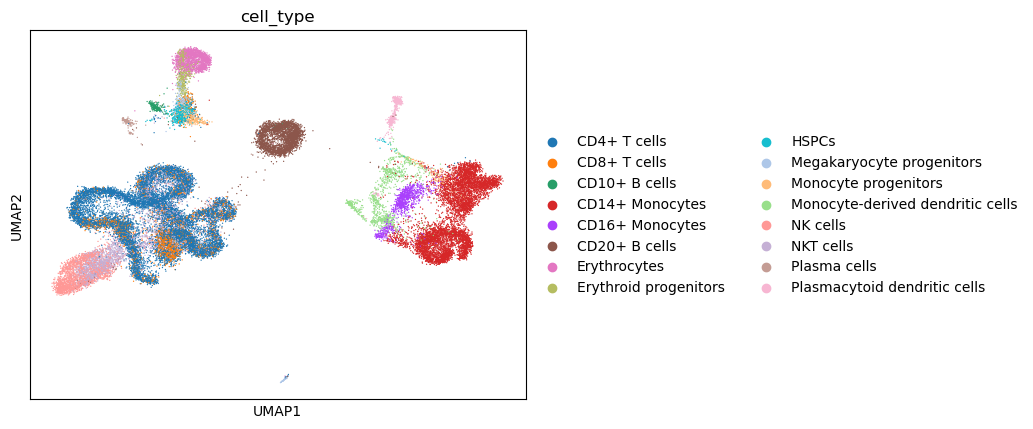

In [5]:
import matplotlib.pyplot as plt

# Choose your method of visualization, UMAP is commonly used
sc.tl.umap(adata)

# Visualize the graph, coloring by cell type
sc.pl.umap(adata, color='cell_type')  # Replace 'cell_type' with the correct column name in adata.obs


/home/icb/fatemehs.hashemig/miniconda3/envs/apex-env/lib/python3.12/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/icb/fatemehs.hashemig/miniconda3/envs/apex-env/lib/python3.12/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/icb/fatemehs.hashemig/miniconda3/envs/apex-env/lib/python3.12/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seei

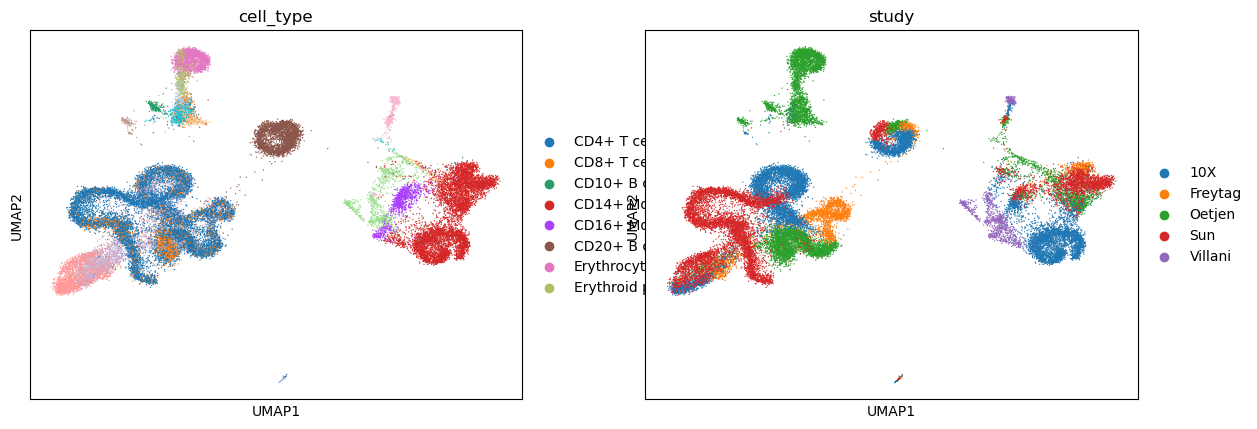

In [27]:
sc.pl.umap(adata, color=['cell_type', 'study'])  # Replace 'cell_type' with the correct column name in adata.obs


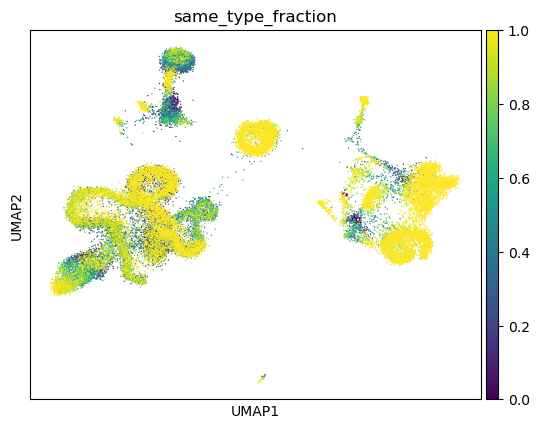

In [6]:
import numpy as np

# Get the indices of neighbors
neighbors = adata.obsp['connectivities'].todense()

# Get the cell types
cell_types = adata.obs['cell_type'].values  # Replace with your actual cell type column name

# Compute the fraction of neighbors with the same cell type
same_type_fraction = []
for i in range(adata.n_obs):
    neighbor_indices = np.nonzero(neighbors[i])[1]
    same_type_count = np.sum(cell_types[neighbor_indices] == cell_types[i])
    same_type_fraction.append(same_type_count / len(neighbor_indices))

# Store this information in the AnnData object
adata.obs['same_type_fraction'] = same_type_fraction

# Visualize the same_type_fraction on the UMAP plot
sc.pl.umap(adata, color='same_type_fraction', cmap='viridis')


## use pca

In [28]:
import scanpy as sc

def process_and_visualize_adata(adata, n_neighbors=15, use_rep='X', color_columns=['cell_type', 'study']):
    # Copy the input adata
    adata_copy = adata.copy()
    
    # Calculate the neighbors using the kNN graph
    sc.pp.neighbors(adata_copy, n_neighbors=n_neighbors, use_rep=use_rep)
    
    # Run UMAP for visualization
    sc.tl.umap(adata_copy)
    
    # Visualize the UMAP, coloring by the specified columns
    sc.pl.umap(adata_copy, color=color_columns)
    
    # Return the modified adata
    return adata_copy


         Falling back to preprocessing with `sc.pp.pca` and default params.


/home/icb/fatemehs.hashemig/miniconda3/envs/apex-env/lib/python3.12/site-packages/anndata/_core/anndata.py:430: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(
/home/icb/fatemehs.hashemig/miniconda3/envs/apex-env/lib/python3.12/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/icb/fatemehs.hashemig/miniconda3/envs/apex-env/lib/python3.12/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/icb/fatemehs.hashemig/miniconda3/envs/apex-env/lib/python3.12/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarn

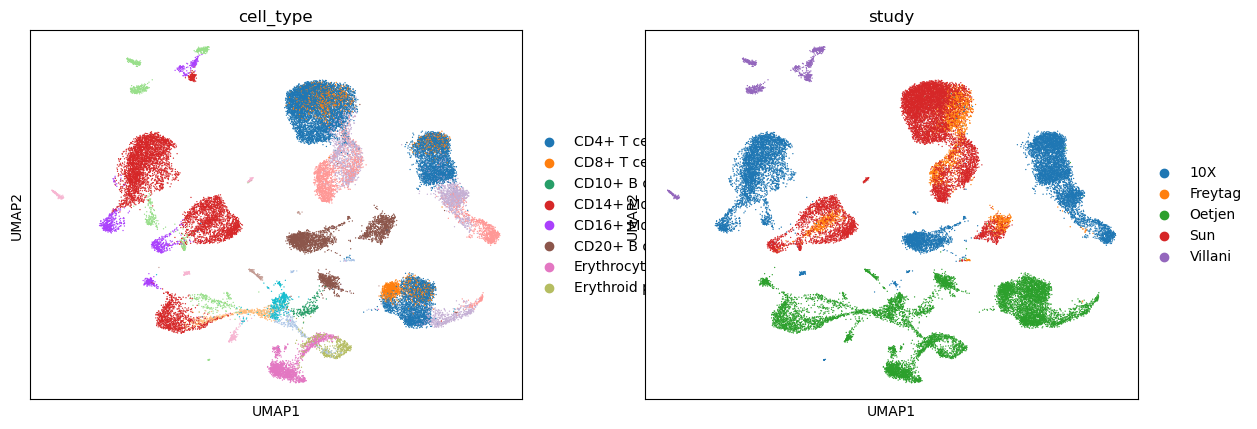

In [29]:
pca_adata = process_and_visualize_adata(adata, use_rep=None)

In [30]:
import numpy as np
import scanpy as sc

def compute_and_visualize_same_type_fraction(adata, cell_type_column='cell_type', umap_color='same_type_fraction', cmap='viridis'):
    # Get the indices of neighbors
    neighbors = adata.obsp['connectivities'].todense()
    
    # Get the cell types
    cell_types = adata.obs[cell_type_column].values
    
    # Compute the fraction of neighbors with the same cell type
    same_type_fraction = []
    for i in range(adata.n_obs):
        neighbor_indices = np.nonzero(neighbors[i])[1]
        same_type_count = np.sum(cell_types[neighbor_indices] == cell_types[i])
        same_type_fraction.append(same_type_count / len(neighbor_indices))
    
    # Store this information in the AnnData object
    adata.obs['same_type_fraction'] = same_type_fraction
    
    # Visualize the same_type_fraction on the UMAP plot
    sc.pl.umap(adata, color=umap_color, cmap=cmap)
    
    # Return the modified adata
    return adata


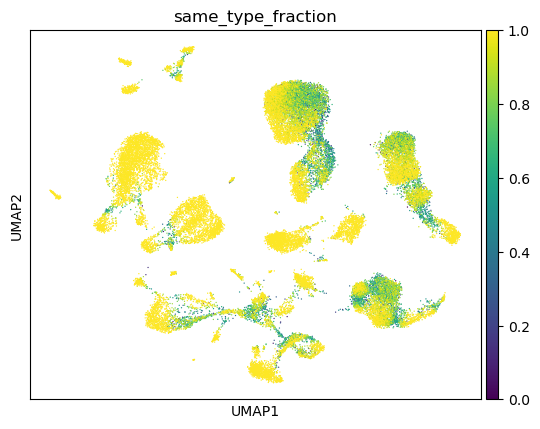

AnnData object with n_obs × n_vars = 33506 × 4000
    obs: 'batch', 'chemistry', 'data_type', 'dpt_pseudotime', 'cell_type', 'mt_frac', 'n_counts', 'n_genes', 'sample_ID', 'size_factors', 'species', 'study', 'tissue', 'same_type_fraction'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'hvg', 'neighbors', 'umap', 'cell_type_colors', 'study_colors'
    obsm: 'X_umap', 'X_pca'
    layers: 'counts'
    obsp: 'distances', 'connectivities'

In [31]:
compute_and_visualize_same_type_fraction(pca_adata)

## visualize network

2024-08-21 09:08:08,306 - Extracting kNN graph from scipy sparse matrix...
2024-08-21 09:08:09,989 - kNN graph extraction completed.
2024-08-21 09:08:09,990 - Extracting cell types for coloring...
2024-08-21 09:08:09,994 - Cell type extraction completed.
2024-08-21 09:08:09,995 - Calculating spectral layout...
2024-08-21 09:11:02,603 - Spectral layout calculation completed in 172.61 seconds.
2024-08-21 09:11:02,644 - Drawing nodes...
Drawing Nodes:   0%|          | 0/100 [00:00<?, ?it/s]/tmp/ipykernel_1585889/3881849999.py:39: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  node_color=[cell_types[n] for n in node_batch],
Drawing Nodes:   0%|          | 0/100 [00:00<?, ?it/s]


ValueError: 'c' argument must be a color, a sequence of colors, or a sequence of numbers, not ['CD16+ Monocytes', 'CD4+ T cells', 'CD14+ Monocytes', 'CD14+ Monocytes', 'NKT cells', 'CD14+ Monocytes', 'CD14+ Monocytes', 'HSPCs', 'HSPCs', 'NKT cells', 'CD8+ T cells', 'CD8+ T cells', 'Erythrocytes', 'CD14+ Monocytes', 'CD10+ B cells', 'NKT cells', 'Plasmacytoid dendritic cells', 'CD16+ Monocytes', 'CD10+ B cells', 'Monocyte progenitors', 'CD4+ T cells', 'NKT cells', 'CD4+ T cells', 'CD4+ T cells', 'NKT cells', 'CD4+ T cells', 'CD10+ B cells', 'CD4+ T cells', 'CD8+ T cells', 'CD20+ B cells', 'NKT cells', 'CD14+ Monocytes', 'HSPCs', 'CD4+ T cells', 'NKT cells', 'CD4+ T cells', 'CD4+ T cells', 'CD14+ Monocytes', 'CD16+ Monocytes', 'NKT cells', 'CD4+ T cells', 'CD4+ T cells', 'CD14+ Monocytes', 'CD4+ T cells', 'Erythrocytes', 'CD4+ T cells', 'Monocyte progenitors', 'Erythrocytes', 'Monocyte progenitors', 'CD14+ Monocytes', 'CD4+ T cells', 'Monocyte progenitors', 'NKT cells', 'Monocyte-derived dendritic cells', 'NKT cells', 'CD14+ Monocytes', 'CD4+ T cells', 'CD8+ T cells', 'Plasma cells', 'CD8+ T cells', 'CD4+ T cells', 'CD8+ T cells', 'CD10+ B cells', 'CD10+ B cells', 'Erythroid progenitors', 'NKT cells', 'NKT cells', 'CD8+ T cells', 'Erythrocytes', 'HSPCs', 'HSPCs', 'Erythrocytes', 'CD4+ T cells', 'CD4+ T cells', 'CD4+ T cells', 'CD4+ T cells', 'CD4+ T cells', 'HSPCs', 'CD8+ T cells', 'CD10+ B cells', 'NKT cells', 'NKT cells', 'NKT cells', 'Monocyte progenitors', 'CD4+ T cells', 'CD4+ T cells', 'HSPCs', 'Monocyte progenitors', 'CD4+ T cells', 'CD10+ B cells', 'CD4+ T cells', 'HSPCs', 'CD4+ T cells', 'NKT cells', 'Megakaryocyte progenitors', 'CD4+ T cells', 'NKT cells', 'Monocyte progenitors', 'CD8+ T cells', 'CD4+ T cells', 'Erythroid progenitors', 'Erythroid progenitors', 'Monocyte progenitors', 'HSPCs', 'Monocyte-derived dendritic cells', 'Monocyte progenitors', 'Monocyte progenitors', 'CD14+ Monocytes', 'CD14+ Monocytes', 'Monocyte progenitors', 'Megakaryocyte progenitors', 'CD4+ T cells', 'CD14+ Monocytes', 'Erythrocytes', 'NKT cells', 'Monocyte progenitors', 'Plasma cells', 'Plasma cells', 'Erythrocytes', 'NK cells', 'HSPCs', 'Plasmacytoid dendritic cells', 'CD14+ Monocytes', 'Monocyte-derived dendritic cells', 'NK cells', 'NKT cells', 'CD4+ T cells', 'NKT cells', 'CD4+ T cells', 'Monocyte progenitors', 'NKT cells', 'CD10+ B cells', 'CD4+ T cells', 'CD16+ Monocytes', 'CD4+ T cells', 'CD14+ Monocytes', 'HSPCs', 'CD4+ T cells', 'CD8+ T cells', 'CD4+ T cells', 'NKT cells', 'CD4+ T cells', 'CD14+ Monocytes', 'Monocyte-derived dendritic cells', 'NKT cells', 'Plasma cells', 'CD14+ Monocytes', 'Erythroid progenitors', 'NKT cells', 'Erythrocytes', 'CD14+ Monocytes', 'CD14+ Monocytes', 'CD14+ Monocytes', 'CD4+ T cells', 'CD4+ T cells', 'HSPCs', 'NKT cells', 'CD8+ T cells', 'Monocyte-derived dendritic cells', 'CD14+ Monocytes', 'NKT cells', 'CD14+ Monocytes', 'CD4+ T cells', 'CD4+ T cells', 'Monocyte-derived dendritic cells', 'HSPCs', 'CD14+ Monocytes', 'HSPCs', 'CD4+ T cells', 'NKT cells', 'CD16+ Monocytes', 'NKT cells', 'HSPCs', 'Monocyte-derived dendritic cells', 'CD14+ Monocytes', 'NKT cells', 'CD14+ Monocytes', 'Megakaryocyte progenitors', 'CD4+ T cells', 'HSPCs', 'CD4+ T cells', 'Erythrocytes', 'CD10+ B cells', 'Monocyte-derived dendritic cells', 'Erythroid progenitors', 'Megakaryocyte progenitors', 'NKT cells', 'CD8+ T cells', 'HSPCs', 'Monocyte progenitors', 'CD16+ Monocytes', 'NKT cells', 'CD14+ Monocytes', 'NKT cells', 'CD4+ T cells', 'NKT cells', 'Megakaryocyte progenitors', 'CD4+ T cells', 'CD4+ T cells', 'Megakaryocyte progenitors', 'Monocyte progenitors', 'Erythrocytes', 'CD8+ T cells', 'CD14+ Monocytes', 'CD14+ Monocytes', 'NKT cells', 'Erythrocytes', 'Plasmacytoid dendritic cells', 'NKT cells', 'Monocyte progenitors', 'Plasmacytoid dendritic cells', 'HSPCs', 'HSPCs', 'CD4+ T cells', 'NKT cells', 'Erythrocytes', 'CD10+ B cells', 'Plasma cells', 'Megakaryocyte progenitors', 'CD14+ Monocytes', 'Erythrocytes', 'Plasmacytoid dendritic cells', 'CD16+ Monocytes', 'CD14+ Monocytes', 'NKT cells', 'NKT cells', 'NKT cells', 'CD14+ Monocytes', 'HSPCs', 'CD8+ T cells', 'CD8+ T cells', 'HSPCs', 'CD14+ Monocytes', 'CD4+ T cells', 'NK cells', 'NKT cells', 'CD10+ B cells', 'CD4+ T cells', 'Monocyte progenitors', 'CD14+ Monocytes', 'CD4+ T cells', 'CD4+ T cells', 'HSPCs', 'NKT cells', 'CD4+ T cells', 'NKT cells', 'Monocyte progenitors', 'CD14+ Monocytes', 'NKT cells', 'CD4+ T cells', 'CD16+ Monocytes', 'Plasmacytoid dendritic cells', 'CD14+ Monocytes', 'Erythrocytes', 'CD10+ B cells', 'Erythrocytes', 'Monocyte progenitors', 'CD10+ B cells', 'Monocyte progenitors', 'CD4+ T cells', 'CD14+ Monocytes', 'Monocyte progenitors', 'CD8+ T cells', 'NKT cells', 'Monocyte progenitors', 'CD8+ T cells', 'CD4+ T cells', 'CD4+ T cells', 'CD16+ Monocytes', 'NKT cells', 'CD8+ T cells', 'CD4+ T cells', 'CD8+ T cells', 'CD4+ T cells', 'NKT cells', 'CD8+ T cells', 'NKT cells', 'Erythrocytes', 'CD4+ T cells', 'Monocyte progenitors', 'CD14+ Monocytes', 'CD14+ Monocytes', 'CD14+ Monocytes', 'HSPCs', 'CD14+ Monocytes', 'Monocyte progenitors', 'CD8+ T cells', 'NKT cells', 'NKT cells', 'CD16+ Monocytes', 'CD4+ T cells', 'NKT cells', 'Monocyte-derived dendritic cells', 'CD16+ Monocytes', 'CD14+ Monocytes', 'CD14+ Monocytes', 'CD4+ T cells', 'Monocyte-derived dendritic cells', 'Megakaryocyte progenitors', 'HSPCs', 'HSPCs', 'CD4+ T cells', 'NKT cells', 'CD4+ T cells', 'Erythroid progenitors', 'CD8+ T cells', 'NKT cells', 'CD8+ T cells', 'Erythrocytes', 'Plasma cells', 'CD20+ B cells', 'CD14+ Monocytes', 'Erythroid progenitors', 'Erythrocytes', 'NKT cells', 'CD14+ Monocytes', 'CD14+ Monocytes', 'NKT cells', 'CD4+ T cells', 'Erythrocytes', 'Erythroid progenitors', 'CD16+ Monocytes', 'CD14+ Monocytes', 'NKT cells', 'NKT cells', 'NKT cells', 'NKT cells', 'CD14+ Monocytes', 'CD14+ Monocytes', 'CD4+ T cells', 'CD4+ T cells', 'NKT cells', 'CD14+ Monocytes', 'CD14+ Monocytes', 'CD8+ T cells', 'NKT cells']

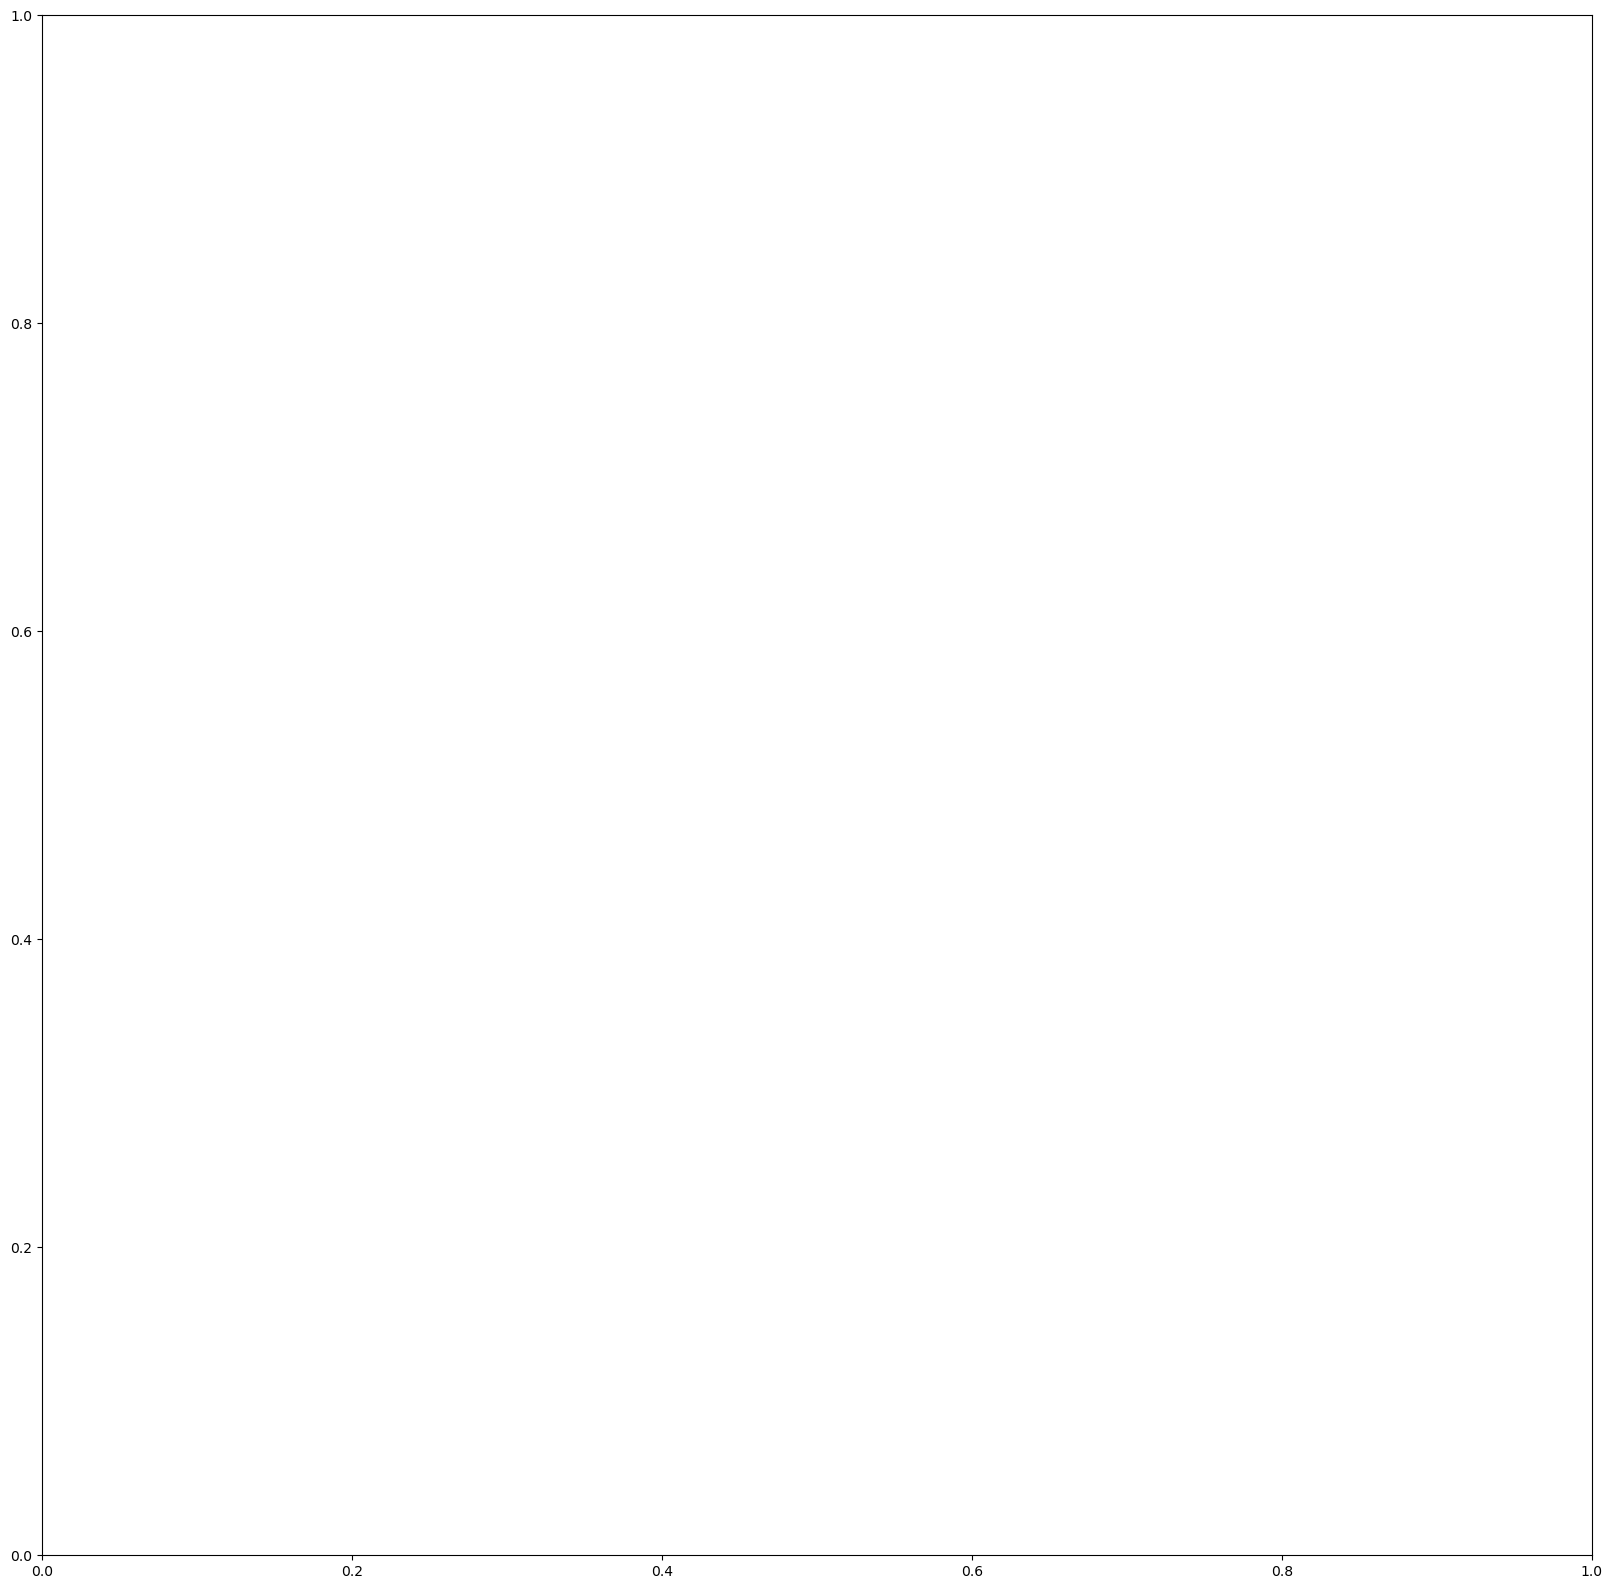

In [14]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import logging
import time
from tqdm import tqdm

# Configure logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(message)s')
logger = logging.getLogger()

# Start timer for the entire process
total_start_time = time.time()

# Log the start of the graph extraction process
logger.info("Extracting kNN graph from scipy sparse matrix...")
knn_graph = nx.from_scipy_sparse_array(adata.obsp['connectivities'])
logger.info("kNN graph extraction completed.")

# Log the start of cell type extraction
logger.info("Extracting cell types for coloring...")
cell_types = adata.obs['cell_type']
logger.info("Cell type extraction completed.")

# Log the start of the layout calculation
logger.info("Calculating spectral layout...")
start_time = time.time()
pos = nx.spectral_layout(knn_graph)
logger.info(f"Spectral layout calculation completed in {time.time() - start_time:.2f} seconds.")




In [33]:
# Get cell type information
cell_types = adata.obs['cell_type']  # Replace 'cell_type' with the correct column name

# Map cell types to unique colors
unique_cell_types = cell_types.unique()
color_map = {cell_type: plt.cm.get_cmap('tab20')(i) for i, cell_type in enumerate(unique_cell_types)}

# Assign colors to nodes based on cell type
node_colors = [color_map[cell_types[node]] for node in range(adata.n_obs)]


/tmp/ipykernel_1585889/2781730775.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = {cell_type: plt.cm.get_cmap('tab20')(i) for i, cell_type in enumerate(unique_cell_types)}
/tmp/ipykernel_1585889/2781730775.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  node_colors = [color_map[cell_types[node]] for node in range(adata.n_obs)]


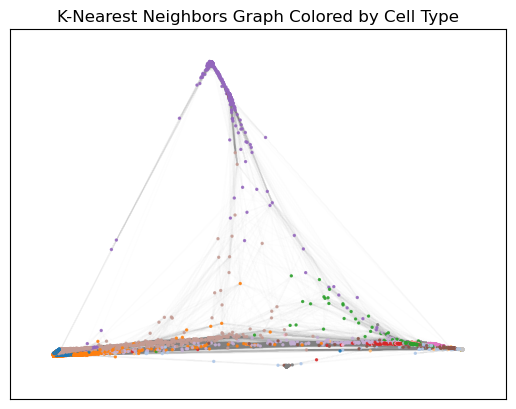

In [37]:
nx.draw_networkx_nodes(knn_graph, pos, node_color=node_colors, node_size=2, alpha=0.8)
nx.draw_networkx_edges(knn_graph, pos, edge_color="grey", alpha=0.01)
plt.title('K-Nearest Neighbors Graph Colored by Cell Type')
plt.show()

In [38]:
def kamada_kawai_layout_with_progress(G, iterations=50):
    """Compute Kamada-Kawai layout with a progress bar."""
    pos = nx.random_layout(G)  # Start with a spring layout for initial positions
    progress = tqdm(total=iterations, desc="Kamada-Kawai Layout")

    # Perform iterative refinement using the Kamada-Kawai algorithm
    for _ in range(iterations):
        pos = nx.fruchterman_reingold_layout(G, pos=pos, iterations=1)
        progress.update(1)

    progress.close()
    return pos

In [40]:
new_pos = kamada_kawai_layout_with_progress(knn_graph)


Kamada-Kawai Layout:  64%|██████▍   | 32/50 [22:59<12:57, 43.18s/it]

KeyboardInterrupt: 

In [ ]:
nx.draw_networkx_nodes(knn_graph, new_pos, node_color=node_colors, node_size=2, alpha=0.8)
nx.draw_networkx_edges(knn_graph, new_pos, edge_color="grey", alpha=0.01)
plt.title('K-Nearest Neighbors Graph Colored by Cell Type')
plt.show()

## sample and visualize

# using scikit learn

In [ ]:
from sklearn.neighbors import NearestNeighbors
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

# Assuming adata is your AnnData object and you want to use the `.X` matrix for kNN
X = adata.X  # Your data matrix (33506 × 4000)

# Compute k-nearest neighbors
n_neighbors = 10  # Adjust this to your needs
nbrs = NearestNeighbors(n_neighbors=n_neighbors, algorithm='auto').fit(X)
distances, indices = nbrs.kneighbors(X)

# Create an empty graph
knn_graph = nx.Graph()

# Add edges to the graph based on kNN
for i in range(X.shape[0]):
    for j in range(1, n_neighbors):  # Skip the first neighbor as it is the node itself
        knn_graph.add_edge(i, indices[i, j])

# You can add node attributes such as cell types to the graph
cell_types = adata.obs['cell_type']  # Replace with your actual cell type column name
for i in range(X.shape[0]):
    knn_graph.nodes[i]['cell_type'] = cell_types[i]


# reproduce seacell

## debug augmentaion

## analyse graphs

In [49]:
import logging
from sklearn.neighbors import NearestNeighbors

# Set up logging
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

logger.info("Starting PCA and Nearest Neighbors computation...")

# Load data matrix
X = ds.adata.X
logger.info(f"Data matrix X loaded with shape: {X.shape}")

# Perform PCA using Scanpy
logger.info(f"Performing PCA with 50 components...")
sc.tl.pca(ds.adata, n_comps=50)
X = ds.adata.obsm['X_pca']
logger.info(f"PCA completed. Transformed data shape: {X.shape}")

# Perform Nearest Neighbors search
logger.info("Fitting Nearest Neighbors model with 51 neighbors...")
nbrs = NearestNeighbors(n_neighbors=51, algorithm="auto").fit(X)
logger.info("Nearest Neighbors model fitting completed.")


2024-08-21 12:14:32,984 - Starting PCA and Nearest Neighbors computation...
2024-08-21 12:14:32,984 - Data matrix X loaded with shape: (33506, 4000)
2024-08-21 12:14:32,985 - Performing PCA with 50 components...
2024-08-21 12:14:38,847 - PCA completed. Transformed data shape: (33506, 50)
2024-08-21 12:14:38,848 - Fitting Nearest Neighbors model with 51 neighbors...
2024-08-21 12:14:38,857 - Nearest Neighbors model fitting completed.


In [50]:
import logging
import scanpy as sc
import numpy as np
from sklearn.neighbors import NearestNeighbors
from collections import Counter

# Set up logging
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

logger.info("Starting PCA, Leiden clustering, and cell type purity evaluation...")

# Step 1: Load data matrix
X = ds.adata.X
logger.info(f"Data matrix X loaded with shape: {X.shape}")

# Step 2: Perform PCA using Scanpy
n_components = 50
logger.info(f"Performing PCA with {n_components} components...")
sc.tl.pca(ds.adata, n_comps=n_components)
X = ds.adata.obsm['X_pca']
logger.info(f"PCA completed. Transformed data shape: {X.shape}")

# Step 4: Compute the KNN graph using Scanpy's built-in function
logger.info("Computing KNN graph...")
sc.pp.neighbors(ds.adata, n_neighbors=51, use_rep='X_pca')
logger.info("KNN graph computed.")

# Step 5: Run Leiden community detection
logger.info("Running Leiden community detection...")
sc.tl.leiden(ds.adata, resolution=1.0, key_added='leiden')
logger.info("Leiden community detection completed.")
logger.info(f"Number of communities detected: {ds.adata.obs['leiden'].nunique()}")

# Step 6: Evaluate Cell Type Purity for each community
logger.info("Evaluating cell type purity for each community...")

# Assume cell types are stored in ds.adata.obs['cell_type']
cell_types = ds.adata.obs['cell_type']
communities = ds.adata.obs['leiden']

# Dictionary to store purity for each community
community_purity = {}

for community in communities.unique():
    # Get the indices of cells in the current community
    community_indices = communities[communities == community].index
    
    # Get the cell types in this community
    community_cell_types = cell_types[community_indices]
    
    # Count the occurrences of each cell type
    cell_type_counts = Counter(community_cell_types)
    
    # Calculate purity as the proportion of the most common cell type
    most_common_cell_type, most_common_count = cell_type_counts.most_common(1)[0]
    purity = most_common_count / len(community_indices)
    
    # Store the purity in the dictionary
    community_purity[community] = purity
    
    logger.info(f"Community {community}: most common cell type is '{most_common_cell_type}' with purity {purity:.2f}")

# Step 7: Optionally, store the purity information in the AnnData object
ds.adata.obs['community_purity'] = ds.adata.obs['leiden'].map(community_purity)

logger.info("Cell type purity evaluation completed.")


2024-08-21 12:18:18,910 - Starting PCA, Leiden clustering, and cell type purity evaluation...
2024-08-21 12:18:18,911 - Data matrix X loaded with shape: (33506, 4000)
2024-08-21 12:18:18,912 - Performing PCA with 50 components...
2024-08-21 12:18:24,385 - PCA completed. Transformed data shape: (33506, 50)
2024-08-21 12:18:24,385 - Computing KNN graph...
2024-08-21 12:18:35,425 - KNN graph computed.
2024-08-21 12:18:35,425 - Running Leiden community detection...
2024-08-21 12:18:45,221 - Leiden community detection completed.
2024-08-21 12:18:45,225 - Number of communities detected: 28
2024-08-21 12:18:45,226 - Evaluating cell type purity for each community...
2024-08-21 12:18:45,338 - Community 23: most common cell type is 'CD16+ Monocytes' with purity 0.98
2024-08-21 12:18:45,341 - Community 1: most common cell type is 'CD4+ T cells' with purity 0.68
2024-08-21 12:18:45,342 - Community 9: most common cell type is 'CD14+ Monocytes' with purity 0.81
2024-08-21 12:18:45,343 - Community 11

In [52]:
# Reset the plot (clearing the current figure)
plt.clf()

# Alternatively, close the current plot window (useful if you're done with the plot)
plt.close()

# If you want to reset all open plots and start fresh
plt.close('all')

In [58]:
# Check how many unique communities are in the 'leiden' column
num_communities = ds.adata.obs['leiden'].nunique()

# Logging the number of communities
logger.info(f"Number of communities detected: {num_communities}")


2024-08-21 12:26:23,237 - Number of communities detected: 28


2024-08-21 12:29:13,745 - Calculating community purity (cell type and study) from scratch...
2024-08-21 12:29:13,769 - Community 23: Cell type purity = 0.98, Study purity = 1.00
2024-08-21 12:29:13,772 - Community 1: Cell type purity = 0.68, Study purity = 1.00
2024-08-21 12:29:13,774 - Community 9: Cell type purity = 0.81, Study purity = 1.00
2024-08-21 12:29:13,776 - Community 11: Cell type purity = 0.40, Study purity = 0.97
2024-08-21 12:29:13,778 - Community 14: Cell type purity = 0.81, Study purity = 1.00
2024-08-21 12:29:13,780 - Community 12: Cell type purity = 0.51, Study purity = 1.00
2024-08-21 12:29:13,782 - Community 18: Cell type purity = 0.55, Study purity = 0.96
2024-08-21 12:29:13,783 - Community 15: Cell type purity = 0.97, Study purity = 1.00
2024-08-21 12:29:13,785 - Community 10: Cell type purity = 0.99, Study purity = 1.00
2024-08-21 12:29:13,787 - Community 26: Cell type purity = 0.98, Study purity = 0.89
2024-08-21 12:29:13,790 - Community 5: Cell type purity = 0

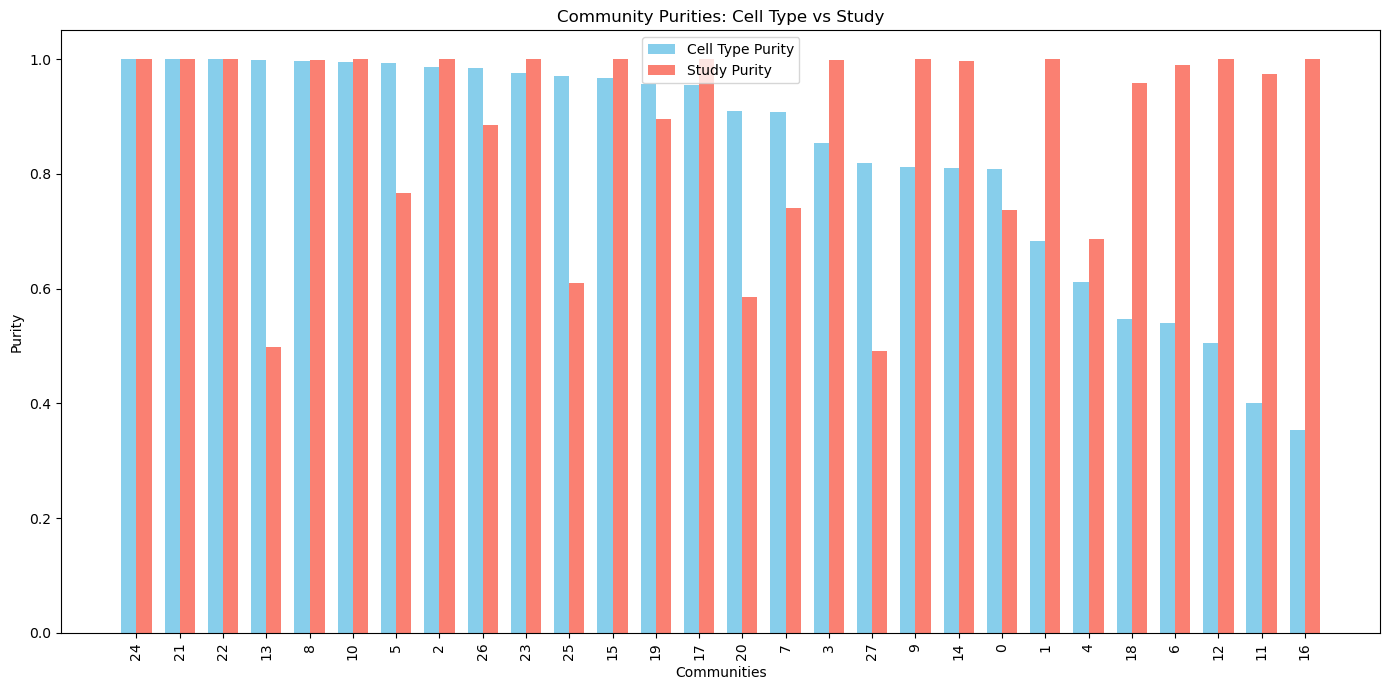

In [60]:
import logging
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np

# Set up logging
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

# Check if the required columns are available in the data
if 'leiden' not in ds.adata.obs or 'cell_type' not in ds.adata.obs or 'study' not in ds.adata.obs:
    logger.error("Required data not found. Please ensure 'leiden', 'cell_type', and 'study' are present in ds.adata.obs.")
else:
    logger.info("Calculating community purity (cell type and study) from scratch...")

    # Prepare data for purity calculation
    communities = ds.adata.obs['leiden']
    cell_types = ds.adata.obs['cell_type']
    study_labels = ds.adata.obs['study']

    # Dictionaries to store purities
    cell_type_purity_dict = {}
    study_purity_dict = {}

    for community in communities.unique():
        # Get the indices of cells in the current community
        community_indices = communities[communities == community].index
        
        # Calculate cell type purity
        community_cell_types = cell_types[community_indices]
        cell_type_counts = Counter(community_cell_types)
        most_common_count_cell_type = cell_type_counts.most_common(1)[0][1]
        cell_type_purity = most_common_count_cell_type / len(community_indices)
        cell_type_purity_dict[community] = cell_type_purity

        # Calculate study purity
        community_study_labels = study_labels[community_indices]
        study_counts = Counter(community_study_labels)
        most_common_count_study = study_counts.most_common(1)[0][1]
        study_purity = most_common_count_study / len(community_indices)
        study_purity_dict[community] = study_purity

        logger.info(f"Community {community}: Cell type purity = {cell_type_purity:.2f}, Study purity = {study_purity:.2f}")

    # Sort communities by cell type purity for better visualization
    sorted_communities = sorted(cell_type_purity_dict, key=cell_type_purity_dict.get, reverse=True)
    sorted_cell_type_purities = [cell_type_purity_dict[community] for community in sorted_communities]
    sorted_study_purities = [study_purity_dict[community] for community in sorted_communities]

    logger.info(f"Plotting {len(sorted_communities)} communities by purity...")

    # Plotting
    bar_width = 0.35
    index = np.arange(len(sorted_communities))

    plt.figure(figsize=(14, 7))
    
    # Bar for cell type purity
    plt.bar(index, sorted_cell_type_purities, bar_width, label='Cell Type Purity', color='skyblue')
    
    # Bar for study purity next to cell type purity
    plt.bar(index + bar_width, sorted_study_purities, bar_width, label='Study Purity', color='salmon')
    
    plt.xlabel('Communities')
    plt.ylabel('Purity')
    plt.title('Community Purities: Cell Type vs Study')
    plt.xticks(index + bar_width / 2, sorted_communities, rotation=90)
    plt.legend()

    plt.tight_layout()

    logger.info("Displaying the plot.")
    
    # Show the plot
    plt.show()


2024-08-21 12:33:50,339 - Calculating community purity (cell type and study) from scratch...
2024-08-21 12:33:50,347 - Community 23: Size = 169, Weighted Cell type purity = 165.00, Weighted Study purity = 169.00
2024-08-21 12:33:50,350 - Community 1: Size = 3657, Weighted Cell type purity = 2496.00, Weighted Study purity = 3657.00
2024-08-21 12:33:50,352 - Community 9: Size = 1216, Weighted Cell type purity = 987.00, Weighted Study purity = 1216.00
2024-08-21 12:33:50,355 - Community 11: Size = 1109, Weighted Cell type purity = 445.00, Weighted Study purity = 1081.00
2024-08-21 12:33:50,357 - Community 14: Size = 531, Weighted Cell type purity = 430.00, Weighted Study purity = 529.00
2024-08-21 12:33:50,358 - Community 12: Size = 847, Weighted Cell type purity = 428.00, Weighted Study purity = 847.00
2024-08-21 12:33:50,360 - Community 18: Size = 353, Weighted Cell type purity = 193.00, Weighted Study purity = 338.00
2024-08-21 12:33:50,361 - Community 15: Size = 493, Weighted Cell typ

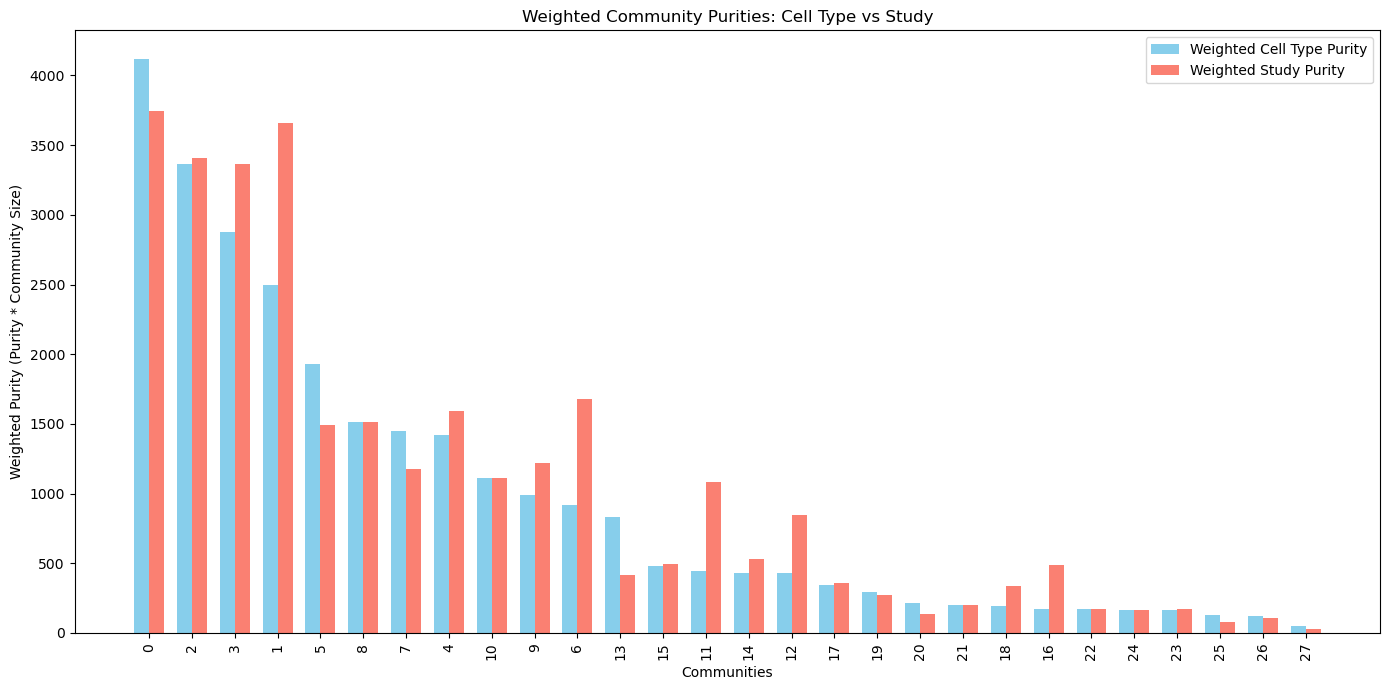

In [62]:
import logging
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np

# Set up logging
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

# Check if the required columns are available in the data
if 'leiden' not in ds.adata.obs or 'cell_type' not in ds.adata.obs or 'study' not in ds.adata.obs:
    logger.error("Required data not found. Please ensure 'leiden', 'cell_type', and 'study' are present in ds.adata.obs.")
else:
    logger.info("Calculating community purity (cell type and study) from scratch...")

    # Prepare data for purity calculation
    communities = ds.adata.obs['leiden']
    cell_types = ds.adata.obs['cell_type']
    study_labels = ds.adata.obs['study']

    # Dictionaries to store weighted purities and community sizes
    weighted_cell_type_purity = {}
    weighted_study_purity = {}
    community_size_dict = {}

    for community in communities.unique():
        # Get the indices of cells in the current community
        community_indices = communities[communities == community].index
        
        # Calculate community size
        community_size = len(community_indices)
        community_size_dict[community] = community_size

        # Calculate cell type purity
        community_cell_types = cell_types[community_indices]
        cell_type_counts = Counter(community_cell_types)
        most_common_count_cell_type = cell_type_counts.most_common(1)[0][1]
        cell_type_purity = most_common_count_cell_type / community_size
        weighted_cell_type_purity[community] = cell_type_purity * community_size

        # Calculate study purity
        community_study_labels = study_labels[community_indices]
        study_counts = Counter(community_study_labels)
        most_common_count_study = study_counts.most_common(1)[0][1]
        study_purity = most_common_count_study / community_size
        weighted_study_purity[community] = study_purity * community_size

        logger.info(f"Community {community}: Size = {community_size}, Weighted Cell type purity = {weighted_cell_type_purity[community]:.2f}, Weighted Study purity = {weighted_study_purity[community]:.2f}")

    # Sort communities by cell type purity for better visualization
    sorted_communities = sorted(weighted_cell_type_purity, key=weighted_cell_type_purity.get, reverse=True)
    sorted_weighted_cell_type_purities = [weighted_cell_type_purity[community] for community in sorted_communities]
    sorted_weighted_study_purities = [weighted_study_purity[community] for community in sorted_communities]

    logger.info(f"Plotting {len(sorted_communities)} communities by weighted purity...")

    # Plotting
    bar_width = 0.35
    index = np.arange(len(sorted_communities))

    plt.figure(figsize=(14, 7))
    
    # Bar for weighted cell type purity
    plt.bar(index, sorted_weighted_cell_type_purities, bar_width, label='Weighted Cell Type Purity', color='skyblue')
    
    # Bar for weighted study purity next to cell type purity
    plt.bar(index + bar_width, sorted_weighted_study_purities, bar_width, label='Weighted Study Purity', color='salmon')
    
    plt.xlabel('Communities')
    plt.ylabel('Weighted Purity (Purity * Community Size)')
    plt.title('Weighted Community Purities: Cell Type vs Study')
    plt.xticks(index + bar_width / 2, sorted_communities, rotation=90)
    plt.legend()

    plt.tight_layout()

    logger.info("Displaying the plot.")
    
    # Show the plot
    plt.show()


In [ ]:
print(1)

2024-08-21 12:39:37,725 - Calculating community purity (cell type and study) from scratch...
2024-08-21 12:39:37,744 - Community 23: Size = 169, Cell type purity = 0.98, Study purity = 1.00
2024-08-21 12:39:37,746 - Community 1: Size = 3657, Cell type purity = 0.68, Study purity = 1.00
2024-08-21 12:39:37,748 - Community 9: Size = 1216, Cell type purity = 0.81, Study purity = 1.00
2024-08-21 12:39:37,750 - Community 11: Size = 1109, Cell type purity = 0.40, Study purity = 0.97
2024-08-21 12:39:37,751 - Community 14: Size = 531, Cell type purity = 0.81, Study purity = 1.00
2024-08-21 12:39:37,753 - Community 12: Size = 847, Cell type purity = 0.51, Study purity = 1.00
2024-08-21 12:39:37,754 - Community 18: Size = 353, Cell type purity = 0.55, Study purity = 0.96
2024-08-21 12:39:37,756 - Community 15: Size = 493, Cell type purity = 0.97, Study purity = 1.00
2024-08-21 12:39:37,758 - Community 10: Size = 1115, Cell type purity = 0.99, Study purity = 1.00
2024-08-21 12:39:37,759 - Commun

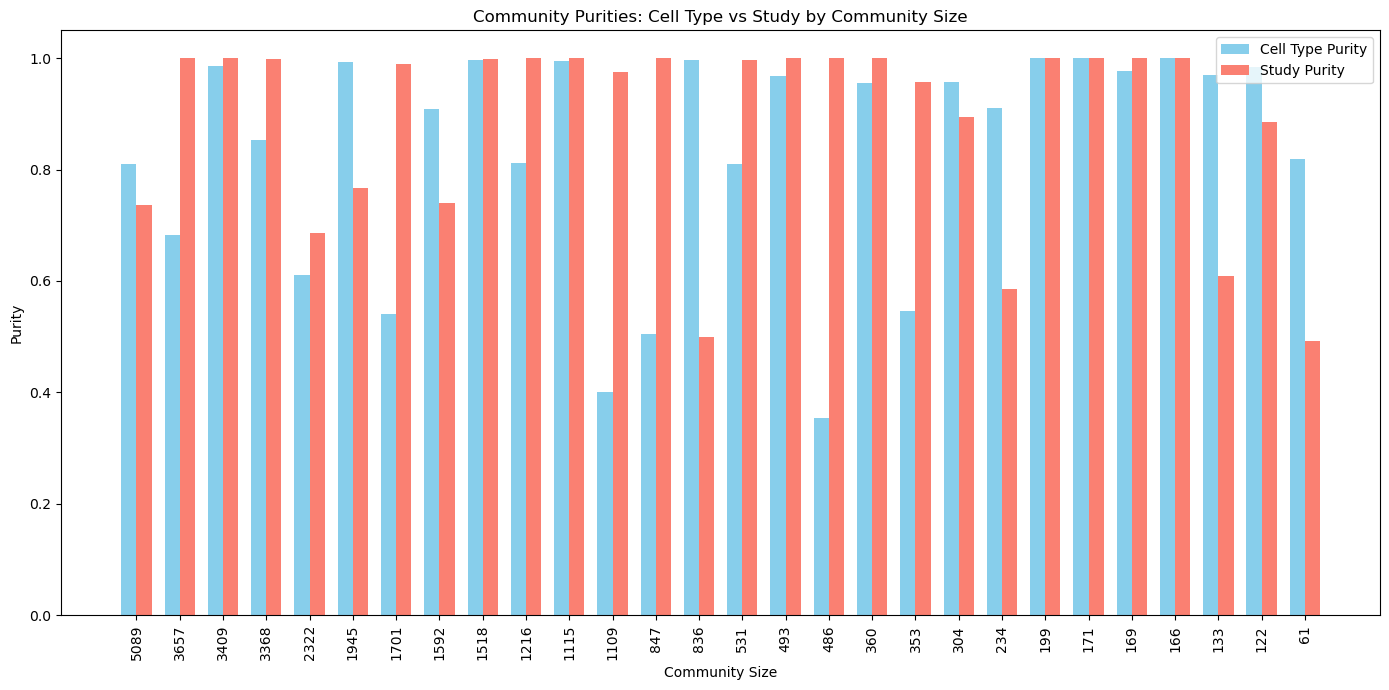

In [64]:
import logging
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np

# Set up logging
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

# Check if the required columns are available in the data
if 'leiden' not in ds.adata.obs or 'cell_type' not in ds.adata.obs or 'study' not in ds.adata.obs:
    logger.error("Required data not found. Please ensure 'leiden', 'cell_type', and 'study' are present in ds.adata.obs.")
else:
    logger.info("Calculating community purity (cell type and study) from scratch...")

    # Prepare data for purity calculation
    communities = ds.adata.obs['leiden']
    cell_types = ds.adata.obs['cell_type']
    study_labels = ds.adata.obs['study']

    # Dictionaries to store purities and community sizes
    cell_type_purity_dict = {}
    study_purity_dict = {}
    community_size_dict = {}

    for community in communities.unique():
        # Get the indices of cells in the current community
        community_indices = communities[communities == community].index
        
        # Calculate community size
        community_size = len(community_indices)
        community_size_dict[community] = community_size

        # Calculate cell type purity
        community_cell_types = cell_types[community_indices]
        cell_type_counts = Counter(community_cell_types)
        most_common_count_cell_type = cell_type_counts.most_common(1)[0][1]
        cell_type_purity = most_common_count_cell_type / community_size
        cell_type_purity_dict[community] = cell_type_purity

        # Calculate study purity
        community_study_labels = study_labels[community_indices]
        study_counts = Counter(community_study_labels)
        most_common_count_study = study_counts.most_common(1)[0][1]
        study_purity = most_common_count_study / community_size
        study_purity_dict[community] = study_purity

        logger.info(f"Community {community}: Size = {community_size}, Cell type purity = {cell_type_purity:.2f}, Study purity = {study_purity:.2f}")

    # Sort communities by size for better visualization
    sorted_communities = sorted(community_size_dict, key=community_size_dict.get, reverse=True)
    sorted_sizes = [community_size_dict[community] for community in sorted_communities]
    sorted_cell_type_purities = [cell_type_purity_dict[community] for community in sorted_communities]
    sorted_study_purities = [study_purity_dict[community] for community in sorted_communities]

    logger.info(f"Plotting {len(sorted_communities)} communities by size and purity...")

    # Plotting
    bar_width = 0.35
    index = np.arange(len(sorted_communities))

    plt.figure(figsize=(14, 7))
    
    # Bar for cell type purity
    plt.bar(index, sorted_cell_type_purities, bar_width, label='Cell Type Purity', color='skyblue')
    
    # Bar for study purity next to cell type purity
    plt.bar(index + bar_width, sorted_study_purities, bar_width, label='Study Purity', color='salmon')
    
    plt.xlabel('Community Size')
    plt.ylabel('Purity')
    plt.title('Community Purities: Cell Type vs Study by Community Size')
    plt.xticks(index + bar_width / 2, sorted_sizes, rotation=90)
    plt.legend()

    plt.tight_layout()

    logger.info("Displaying the plot.")
    
    # Show the plot
    plt.show()
